<a href="https://colab.research.google.com/github/joaovictortbm/PrevisaoPrecoBitcoin/blob/main/PrevisoesBitcoin_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Coletando dados

In [2]:
pip install yfinance pandas

In [11]:
import yfinance as yf

# Baixando dados históricos do Bitcoin dos últimos 5 anos
btc = yf.download('BTC-USD', start='2019-01-01', end='2024-03-21')

btc.to_csv('btc_prices.csv')

[*********************100%***********************]  1 of 1 completed


In [12]:
btc.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990
2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836
2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219
2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467
2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824


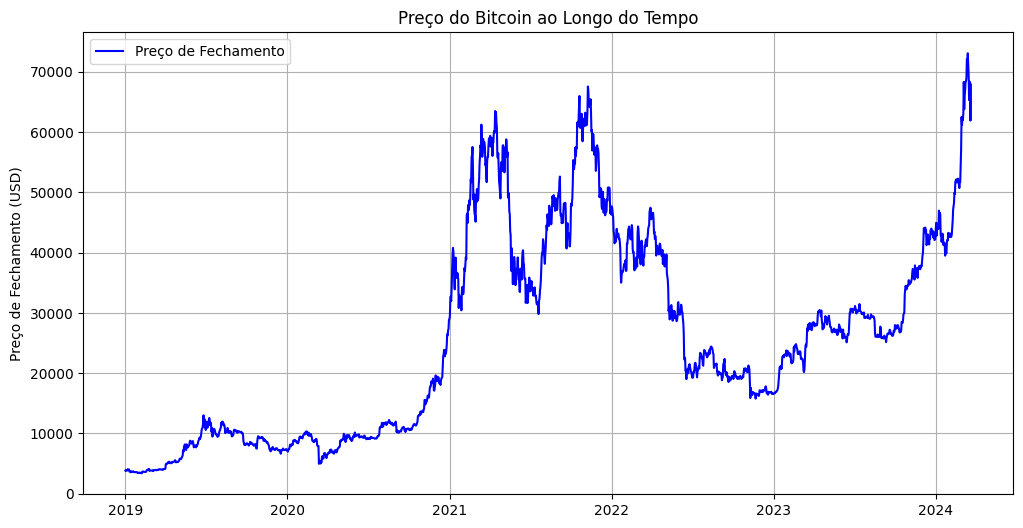

In [13]:
# Plotando gráfico de preço por data
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['Close'], label='Preço de Fechamento', color='blue')
plt.title('Preço do Bitcoin ao Longo do Tempo')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.grid(True)

# Pré processamento dos dados

In [62]:
x = btc['Close'].values.reshape(-1,1)

In [63]:
# Normalizando dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[:len(x)//2])
x = scaler.transform(x).flatten()

In [67]:
T = 20  # Número de períodos (look_back)
X = []
Y = []

# Criando as sequências
for i in range(len(x) - T):
    X.append(x[i:i+T])
    Y.append(x[i+T])

# Convertendo para arrays numpy
X = np.array(X).reshape(-1 ,T ,1)
Y = np.array(Y)

print(f"x shape: {X.shape}, y shape: {Y.shape}")


x shape: (1886, 20, 1), y shape: (1886,)


In [68]:
# Dividindo entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Contruindo modelo

In [72]:
model = tf.keras.Sequential([
    # Camadas LSTM
    tf.keras.layers.LSTM(units=50, return_sequences= True, input_shape=(T, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50, return_sequences= False),
    tf.keras.layers.Dropout(0.2),

    # Camada densa
    tf.keras.layers.Dense(units=1)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
# Compilando modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# Treinando modelo
r = model.fit(X_train, y_train, epochs=80, batch_size=32,
              validation_data =(X_test, y_test))

Epoch 1/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.6088 - val_loss: 0.0367
Epoch 2/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0463 - val_loss: 0.0271
Epoch 3/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0374 - val_loss: 0.0213
Epoch 4/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0372 - val_loss: 0.0232
Epoch 5/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0356 - val_loss: 0.0226
Epoch 6/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0275 - val_loss: 0.0161
Epoch 7/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0229 - val_loss: 0.0181
Epoch 8/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0268 - val_loss: 0.0162
Epoch 9/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0328 - val_loss: 0.0148
Epoch 10/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0223 - val_loss: 0.0143
Epoch 11/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0240 - val_loss: 0.0138
Epoch 12/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0

# Avaliações e gráficos dos resultados

In [77]:
# Avaliando modelo
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0072
Loss: 0.00663026561960578


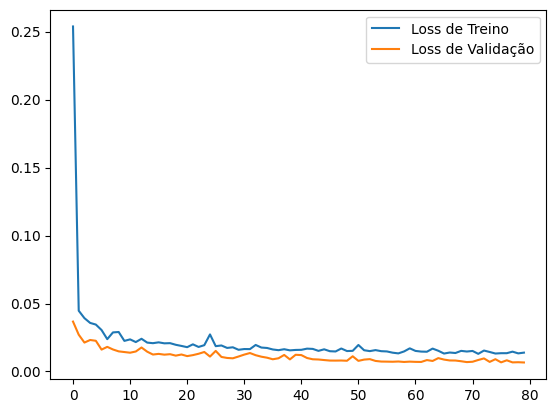

In [78]:
# Plotando loss por interação
plt.plot(r.history['loss'], label='Loss de Treino')
plt.plot(r.history['val_loss'], label='Loss de Validação')
plt.legend()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


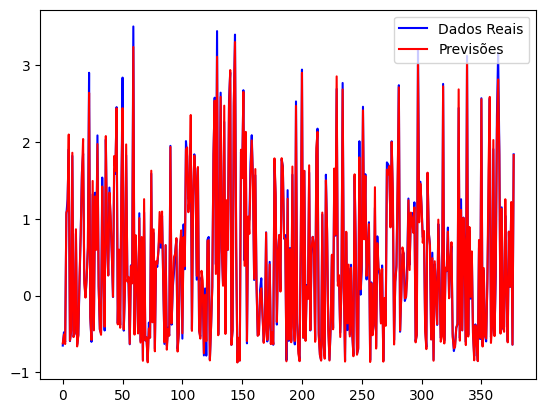

In [82]:
# Gráfico comparando previsões e dados reais
y_pred = model.predict(X_test)
predictions = y_pred[:,0]
plt.plot(y_test, label='Dados Reais', color='blue')
plt.plot(predictions, label='Previsões', color='red')
plt.legend()
plt.show()